In [841]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [842]:
pd.set_option('display.max_columns', None)

In [843]:
#normalize charting
sns.set_theme()

In [844]:
#read in csvs 1. nyt_api = all nyt api scrape 2. goodreads1 = everything from 1st goodreads scrape 3. goodreads2 = everything from second scrape
nyt_api = pd.read_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\merged_dataframe2.csv")
goodreads1 = pd.read_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\clean_goodreads.csv")
goodreads2 = pd.read_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\goodreads_found_june10.csv")

In [845]:
nyt_api['nyt_list'].value_counts()

Combined Print & E-Book Fiction    7530
E-Book Fiction                     3901
Mass Market Paperback Weekly       3900
Hardcover Fiction                  3900
Trade Fiction Paperback            3900
Trade Paperback Fiction            3610
Audio Fiction                       930
Mass Market Monthly                 645
Name: nyt_list, dtype: int64

In [846]:
nyt_api.head(5)

,title,description,contributor,author,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month
0,FULL PACKAGE,A man shares a cramped apartment with his frie...,by Lauren Blakely,Lauren Blakely,NaN,0.0,NaN,Lauren Blakely,A00B01MT5HMRV,None,1,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
1,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
2,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,3,4,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
3,RING OF FIRE,"Pike Logan, a member of a secret counterterror...",by Brad Taylor,Brad Taylor,NaN,0.0,NaN,Dutton,9781101984772,None,4,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
4,SMALL GREAT THINGS,"A medical crisis entangles a black nurse, a wh...",by Jodi Picoult,Jodi Picoult,NaN,0.0,NaN,Ballantine,9780345544964,034554496X,5,7,9,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN


In [847]:
len(nyt_api)

32216

In [848]:
goodreads1.head()

,Unnamed: 0,isbn,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
0,0,9780440337973,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
1,1,9780385541206,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
2,2,9781101984772,Ring of Fire,Brad Taylor,4.28,4371.0,230.0,2017-01-10,"Thriller, Fiction, Action, Military Fiction, S...",Thriller,Fiction,Action
3,3,9780345544964,Small Great Things,Jodi Picoult,4.35,342790.0,30250.0,2016-10-11,"Fiction, Contemporary, Audiobook, Adult, Adult...",Fiction,Contemporary,Audiobook
4,4,9781476738031,A Man Called Ove,Fredrik Backman,4.38,917052.0,98756.0,2012-08-27,"Fiction, Contemporary, Audiobook, Humor, Adult...",Fiction,Contemporary,Audiobook


In [849]:
len(goodreads1)

6828

In [850]:
goodreads2.head()

,Unnamed: 0,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre
0,0,Full Package,Lauren Blakely,4.04,13935.0,1313.0,"First published January 9, 2017","Genres, Romance, Contemporary Romance, Contemp..."
1,1,Shelter for Adeline,Susan Stoker,4.46,3297.0,275.0,"Published January 10, 2017","Genres, Romance, Romantic Suspense, Contempora..."
2,2,Until Ashlyn,Aurora Rose Reynolds,4.19,13597.0,1112.0,"First published December 27, 2016","Genres, Romance, Contemporary, Contemporary Ro..."
3,3,Melt,Helen Hardt,4.34,12645.0,637.0,"Published December 20, 2016","Genres, Romance, Erotica, Contemporary Romance..."
4,4,Craving,Helen Hardt,3.99,35898.0,2784.0,"First published May 3, 2016","Genres, Romance, Erotica, Contemporary Romance..."


In [851]:
len(goodreads2)

1163

In [852]:
#convert isbn data types for a merge
nyt_api['primary_isbn13'] = nyt_api['primary_isbn13'].astype(str)
goodreads1['isbn'] = goodreads1['isbn'].astype(str)

In [853]:
#merge all nyt info with everything from 1st gr scrape on isbn
nyt_with_goodreads1 = pd.merge(nyt_api, goodreads1, left_on='primary_isbn13', right_on='isbn', how='left')

In [854]:
len(nyt_with_goodreads1)

38280

In [855]:
#checck for duplicates in goodreads1- is this the cause for the increase in rows from this left merge?
duplicate_isbns = goodreads1[goodreads1['isbn'].duplicated()]
len(duplicate_isbns)

1133

In [856]:
#Fix the duplicated data- it may be looking up different versions of the same book.  Perform merge again
goodreads1 = goodreads1.drop_duplicates(subset='isbn', keep='first')
nyt_with_goodreads1 = pd.merge(nyt_api, goodreads1, left_on='primary_isbn13', right_on='isbn', how='left')
len(nyt_with_goodreads1)

32216

In [857]:
nyt_with_goodreads1.head()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,isbn,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
0,FULL PACKAGE,A man shares a cramped apartment with his frie...,by Lauren Blakely,Lauren Blakely,NaN,0.0,NaN,Lauren Blakely,A00B01MT5HMRV,None,1,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,0.0,9780440337973,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
2,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,3,4,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,1.0,9780385541206,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
3,RING OF FIRE,"Pike Logan, a member of a secret counterterror...",by Brad Taylor,Brad Taylor,NaN,0.0,NaN,Dutton,9781101984772,None,4,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,2.0,9781101984772,Ring of Fire,Brad Taylor,4.28,4371.0,230.0,2017-01-10,"Thriller, Fiction, Action, Military Fiction, S...",Thriller,Fiction,Action
4,SMALL GREAT THINGS,"A medical crisis entangles a black nurse, a wh...",by Jodi Picoult,Jodi Picoult,NaN,0.0,NaN,Ballantine,9780345544964,034554496X,5,7,9,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,3.0,9780345544964,Small Great Things,Jodi Picoult,4.35,342790.0,30250.0,2016-10-11,"Fiction, Contemporary, Audiobook, Adult, Adult...",Fiction,Contemporary,Audiobook


In [858]:
#find everything with a null title_y column.  These ones didn't get matched with goodreads
null_title_y= nyt_with_goodreads1[nyt_with_goodreads1['title_y'].isnull()]
len(null_title_y)

6816

In [859]:
#remove the null title_y's from the big dataframe.  We'll union those back in when they get their match
nyt_with_goodreads_no_nulls = nyt_with_goodreads1.dropna(subset=['title_y'])


In [860]:
len(nyt_with_goodreads_no_nulls)

25400

In [861]:
null_title_y.head()
null_title_y.columns

Index(['title_x', 'description', 'contributor', 'author_x', 'contributor_note',
       'price', 'age_group', 'publisher', 'primary_isbn13', 'primary_isbn10',
       'rank', 'rank_last_week', 'weeks_on_list', 'asterisk', 'dagger', 'week',
       'nyt_list', 'file', 'month', 'Unnamed: 0', 'isbn', 'title_y',
       'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genre', 'genre1', 'genre2', 'genre3'],
      dtype='object')

In [862]:
#delete empty columns in null_title_y
columns_to_drop = ['Unnamed: 0', 'isbn', 'title_y', 'author_y', 'avg_rating', 'count_rating', 'count_reviews', 'date_published', 'top_genre', 'genre1', 'genre2', 'genre3']
null_title_y = null_title_y.drop(columns_to_drop, axis=1)
null_title_y.head()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month
0,FULL PACKAGE,A man shares a cramped apartment with his frie...,by Lauren Blakely,Lauren Blakely,NaN,0.0,NaN,Lauren Blakely,A00B01MT5HMRV,None,1,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
5,SHELTER FOR ADELINE,A fireman must keep his overprotective nature ...,by Susan Stoker,Susan Stoker,NaN,0.0,NaN,Stoker Aces Production,A00B01MF62CN8,None,6,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN
37,UNTIL ASHLYN,An impulsive Vegas wedding turns out to have s...,by Aurora Rose Reynolds,Aurora Rose Reynolds,NaN,0.0,NaN,Aurora Rose Reynolds,A00B01LYEOR3I,None,8,0,1,0,0,2017-01-11,E-Book Fiction,2012to2017_e_book_fiction,NaN
45,MELT,"In this fourth book in the series, the oldest ...",by Helen Hardt,Helen Hardt,NaN,0.0,NaN,Waterhouse,A00B01HFPDRI4,None,1,0,1,0,0,2017-01-04,E-Book Fiction,2012to2017_e_book_fiction,NaN
54,CRAVING,A jilted bride decamps to a Colorado ranch whe...,by Helen Hardt,Helen Hardt,NaN,0.0,NaN,Waterhouse,A00B01FWPZQRY,None,10,0,2,0,0,2017-01-04,E-Book Fiction,2012to2017_e_book_fiction,NaN


In [863]:
goodreads2.head()

,Unnamed: 0,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre
0,0,Full Package,Lauren Blakely,4.04,13935.0,1313.0,"First published January 9, 2017","Genres, Romance, Contemporary Romance, Contemp..."
1,1,Shelter for Adeline,Susan Stoker,4.46,3297.0,275.0,"Published January 10, 2017","Genres, Romance, Romantic Suspense, Contempora..."
2,2,Until Ashlyn,Aurora Rose Reynolds,4.19,13597.0,1112.0,"First published December 27, 2016","Genres, Romance, Contemporary, Contemporary Ro..."
3,3,Melt,Helen Hardt,4.34,12645.0,637.0,"Published December 20, 2016","Genres, Romance, Erotica, Contemporary Romance..."
4,4,Craving,Helen Hardt,3.99,35898.0,2784.0,"First published May 3, 2016","Genres, Romance, Erotica, Contemporary Romance..."


In [864]:
len(goodreads2)

1163

In [865]:
#check for duplicates
duplicate = goodreads2[goodreads2[['author', 'title']].duplicated()]
len(duplicate)

243

In [866]:
#Remove duplicates
goodreads2 = goodreads2.drop_duplicates(subset=['author', 'title'], keep=False)
len(goodreads2)

752

In [867]:
#convert columns to lowercase for case-insensitive matches
null_title_y['title_x'] = null_title_y['title_x'].str.lower()
null_title_y['author_x'] = null_title_y['author_x'].str.lower()
goodreads2['title'] = goodreads2['title'].str.lower()
goodreads2['author'] = goodreads2['author'].str.lower()

In [868]:
#join null_title_y dataframe with goodreads2 from second scrape
goodreads2match = pd.merge(null_title_y, goodreads2, left_on=['title_x', 'author_x'], right_on=['title', 'author'], how='left')

In [869]:
goodreads2match.tail(5)

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title,author,avg_rating,count_rating,count_reviews,date_published,top_genre
6811,juror #3,Ruby Bozarth defends a college football star c...,by James Patterson and Nancy Allen,james patterson and nancy allen,NaN,0.0,NaN,Vision,9781538713792,1538713799,5,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6812,turning point,Four American trauma doctors face difficult ch...,by Danielle Steel,danielle steel,NaN,0.0,NaN,Dell,9780399179372,0399179372,6,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1159.0,turning point,danielle steel,4.01,8911.0,572.0,"First published January 10, 2019","Genres, Romance, Fiction, Contemporary, Chick ..."
6813,connections in death,The 48th book of the In Death series. Eve Dall...,by J.D. Robb,jd robb,NaN,0.0,NaN,St. Martin's,9781250308153,1250308151,8,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6814,crucible,Monk Kokkalis and Commander Gray Pierce use ar...,by James Rollins,james rollins,NaN,0.0,NaN,Morrow,9780062381798,0062381792,10,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1161.0,crucible,james rollins,4.20,10043.0,870.0,"First published January 22, 2019","Genres, Thriller, Fiction, Adventure, Action, ..."
6815,a column of fire,A pair of lovers find themselves on opposite s...,by Ken Follett,ken follett,NaN,0.0,NaN,Penguin,9780451478009,0451478002,12,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1162.0,a column of fire,ken follett,4.24,97488.0,6773.0,"First published September 12, 2017","Genres, Historical Fiction, Fiction, Historica..."


In [870]:
#count how many nulls remain in title_y - these are the final that couldn't be found
null_count = goodreads2match['title'].isnull().sum()
null_count

5027

In [871]:
len(goodreads2match)

6816

In [872]:
nyt_with_goodreads_no_nulls.columns

Index(['title_x', 'description', 'contributor', 'author_x', 'contributor_note',
       'price', 'age_group', 'publisher', 'primary_isbn13', 'primary_isbn10',
       'rank', 'rank_last_week', 'weeks_on_list', 'asterisk', 'dagger', 'week',
       'nyt_list', 'file', 'month', 'Unnamed: 0', 'isbn', 'title_y',
       'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genre', 'genre1', 'genre2', 'genre3'],
      dtype='object')

In [873]:
goodreads2match.columns

Index(['title_x', 'description', 'contributor', 'author_x', 'contributor_note',
       'price', 'age_group', 'publisher', 'primary_isbn13', 'primary_isbn10',
       'rank', 'rank_last_week', 'weeks_on_list', 'asterisk', 'dagger', 'week',
       'nyt_list', 'file', 'month', 'Unnamed: 0', 'title', 'author',
       'avg_rating', 'count_rating', 'count_reviews', 'date_published',
       'top_genre'],
      dtype='object')

In [874]:
#prepare dfs for union, check columns for each
#remove isbn column from nyt_with_goodreads_no_nulls
nyt_with_goodreads_no_nulls = nyt_with_goodreads_no_nulls.drop('isbn', axis=1)

In [875]:
#fix title/author names in goodreads2 to match up
goodreads2match = goodreads2match.rename(columns={'title': 'title_y', 'author': 'author_y'})

In [876]:
#Fix date_published column
goodreads2match['date_published'] = goodreads2match['date_published'].str.replace('First published ', '').str.replace('Published ', '')

In [877]:
#convert to datetime format
goodreads2match['date_published'] = pd.to_datetime(goodreads2match['date_published'], errors='coerce')
goodreads2match.tail()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre
6811,juror #3,Ruby Bozarth defends a college football star c...,by James Patterson and Nancy Allen,james patterson and nancy allen,NaN,0.0,NaN,Vision,9781538713792,1538713799,5,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
6812,turning point,Four American trauma doctors face difficult ch...,by Danielle Steel,danielle steel,NaN,0.0,NaN,Dell,9780399179372,0399179372,6,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1159.0,turning point,danielle steel,4.01,8911.0,572.0,2019-01-10,"Genres, Romance, Fiction, Contemporary, Chick ..."
6813,connections in death,The 48th book of the In Death series. Eve Dall...,by J.D. Robb,jd robb,NaN,0.0,NaN,St. Martin's,9781250308153,1250308151,8,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
6814,crucible,Monk Kokkalis and Commander Gray Pierce use ar...,by James Rollins,james rollins,NaN,0.0,NaN,Morrow,9780062381798,0062381792,10,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1161.0,crucible,james rollins,4.20,10043.0,870.0,2019-01-22,"Genres, Thriller, Fiction, Adventure, Action, ..."
6815,a column of fire,A pair of lovers find themselves on opposite s...,by Ken Follett,ken follett,NaN,0.0,NaN,Penguin,9780451478009,0451478002,12,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1162.0,a column of fire,ken follett,4.24,97488.0,6773.0,2017-09-12,"Genres, Historical Fiction, Fiction, Historica..."


In [878]:
#Fix genres column
goodreads2match['top_genre'] = goodreads2match['top_genre'].str.replace('Genres, ', '')
#Split column into list of genres
genre_list = goodreads2match['top_genre'].str.split(', ')
goodreads2match['genre1'] = genre_list.str[0]
goodreads2match['genre2'] = genre_list.str[1]
goodreads2match['genre3'] = genre_list.str[2]
goodreads2match.tail()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
6811,juror #3,Ruby Bozarth defends a college football star c...,by James Patterson and Nancy Allen,james patterson and nancy allen,NaN,0.0,NaN,Vision,9781538713792,1538713799,5,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6812,turning point,Four American trauma doctors face difficult ch...,by Danielle Steel,danielle steel,NaN,0.0,NaN,Dell,9780399179372,0399179372,6,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1159.0,turning point,danielle steel,4.01,8911.0,572.0,2019-01-10,"Romance, Fiction, Contemporary, Chick Lit, Aud...",Romance,Fiction,Contemporary
6813,connections in death,The 48th book of the In Death series. Eve Dall...,by J.D. Robb,jd robb,NaN,0.0,NaN,St. Martin's,9781250308153,1250308151,8,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6814,crucible,Monk Kokkalis and Commander Gray Pierce use ar...,by James Rollins,james rollins,NaN,0.0,NaN,Morrow,9780062381798,0062381792,10,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1161.0,crucible,james rollins,4.20,10043.0,870.0,2019-01-22,"Thriller, Fiction, Adventure, Action, Science ...",Thriller,Fiction,Adventure
6815,a column of fire,A pair of lovers find themselves on opposite s...,by Ken Follett,ken follett,NaN,0.0,NaN,Penguin,9780451478009,0451478002,12,0,0,0,0,NaN,Mass Market Monthly,2019to2023_mass_market_monthly,2019-10-23,1162.0,a column of fire,ken follett,4.24,97488.0,6773.0,2017-09-12,"Historical Fiction, Fiction, Historical, Audio...",Historical Fiction,Fiction,Historical


In [879]:
#Union goodreads2match onto large combined set- nyt_with_goodreads_no_nulls
full_merge = nyt_with_goodreads_no_nulls.append(goodreads2match, ignore_index=True)

C:\Users\melan\AppData\Local\Temp\ipykernel_2404\2223944404.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_merge = nyt_with_goodreads_no_nulls.append(goodreads2match, ignore_index=True)


In [880]:
full_merge.head()

,title_x,description,contributor,author_x,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genre,genre1,genre2,genre3
0,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,0.0,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance
1,THE WHISTLER,A whistleblower alerts a Florida investigator ...,by John Grisham,John Grisham,NaN,0.0,NaN,Doubleday,9780385541206,0385541201,3,4,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,1.0,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller
2,RING OF FIRE,"Pike Logan, a member of a secret counterterror...",by Brad Taylor,Brad Taylor,NaN,0.0,NaN,Dutton,9781101984772,None,4,0,1,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,2.0,Ring of Fire,Brad Taylor,4.28,4371.0,230.0,2017-01-10,"Thriller, Fiction, Action, Military Fiction, S...",Thriller,Fiction,Action
3,SMALL GREAT THINGS,"A medical crisis entangles a black nurse, a wh...",by Jodi Picoult,Jodi Picoult,NaN,0.0,NaN,Ballantine,9780345544964,034554496X,5,7,9,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,3.0,Small Great Things,Jodi Picoult,4.35,342790.0,30250.0,2016-10-11,"Fiction, Contemporary, Audiobook, Adult, Adult...",Fiction,Contemporary,Audiobook
4,A MAN CALLED OVE,"An angry old curmudgeon gets new neighbors, an...",by Fredrik Backman,Fredrik Backman,NaN,0.0,NaN,Atria,9781476738031,None,7,9,3,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,4.0,A Man Called Ove,Fredrik Backman,4.38,917052.0,98756.0,2012-08-27,"Fiction, Contemporary, Audiobook, Humor, Adult...",Fiction,Contemporary,Audiobook


In [881]:
len(full_merge)

32216

In [882]:
full_merge.isnull().sum(axis=0)

title_x                 0
description           284
contributor             0
author_x                0
contributor_note    32197
price                   0
age_group           32216
publisher               0
primary_isbn13          0
primary_isbn10       1324
rank                    0
rank_last_week          0
weeks_on_list           0
asterisk                0
dagger                  0
week                 5475
nyt_list             3900
file                    0
month               30641
Unnamed: 0           5027
title_y              5027
author_y             5027
avg_rating           5027
count_rating         5027
count_reviews        5027
date_published       5027
top_genre            5047
genre1               5047
genre2               5085
genre3               5105
dtype: int64

In [883]:
#There are 177 that did not have goodreads match.  This is 0.55% of the total.  Not bad! Save as CSV

full_merge.to_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\full_merge_june13.csv")

In [884]:
#clean up column names
full_merge = full_merge.rename(columns={'title_x': 'title', 'author_x': 'author', 'top_genre': 'top_genres'})
full_merge.head(1)

,title,description,contributor,author,contributor_note,price,age_group,publisher,primary_isbn13,primary_isbn10,rank,rank_last_week,weeks_on_list,asterisk,dagger,week,nyt_list,file,month,Unnamed: 0,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genres,genre1,genre2,genre3
0,THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY,"After World War II, a journalist travels to th...",by Mary Ann Shaffer and Annie Barrows,Mary Ann Shaffer and Annie Barrows,NaN,0.0,NaN,Dial,9780440337973,0440337976,2,0,2,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,0.0,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance


In [885]:
#drop unnecessary columns
columns_to_drop = ['contributor', 'contributor_note', 'price', 'age_group', 'primary_isbn10', 'asterisk', 'dagger', 'Unnamed: 0']
full_merge = full_merge.drop(columns_to_drop, axis=1)

In [886]:
#change to title case
full_merge['title'] = full_merge['title'].str.title()

In [887]:
full_merge.to_csv(r"C:\Users\melan\Documents\DA8\Projects\bestseller_capstone\data\full_merge_clean.csv")

In [888]:
#investigate null values in nyt_list
null_rows_df = full_merge[full_merge['nyt_list'].isnull()]
null_rows_df['file'].value_counts()

2018to2023_hardcover    3900
Name: file, dtype: int64

In [889]:
#looks like I forgot to add the nyt_list after the API pull for this section of hardcover fiction.  Fix that
full_merge['nyt_list'] = full_merge['nyt_list'].fillna('Hardcover Fiction')

In [890]:
#have some nyt_list as trade fiction paperback and some as trade paperback fiction.  Fix that 
full_merge['nyt_list'] = full_merge['nyt_list'].replace(['Trade Fiction Paperback'], 'Trade Paperback Fiction')

In [891]:
#Some of the authors are still in lowercase
full_merge['author'] = full_merge['author'].str.title()

In [892]:
#George RR Martin is showing up with a couple different spacings.  Fix that
full_merge['author'] = full_merge['author'].replace(['George Rr Martin', 'George R R Martin'], 'George R.R. Martin')

In [893]:
#Find which authors are the most frequently on the list (overall)
author_counts = full_merge['author'].value_counts()
top_10_authors = author_counts.head(10)

C:\Users\melan\AppData\Local\Temp\ipykernel_2404\679908840.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(), rotation=0)


[Text(0.0, 0, '0'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '400'),
 Text(600.0, 0, '600'),
 Text(800.0, 0, '800'),
 Text(1000.0, 0, '1000')]

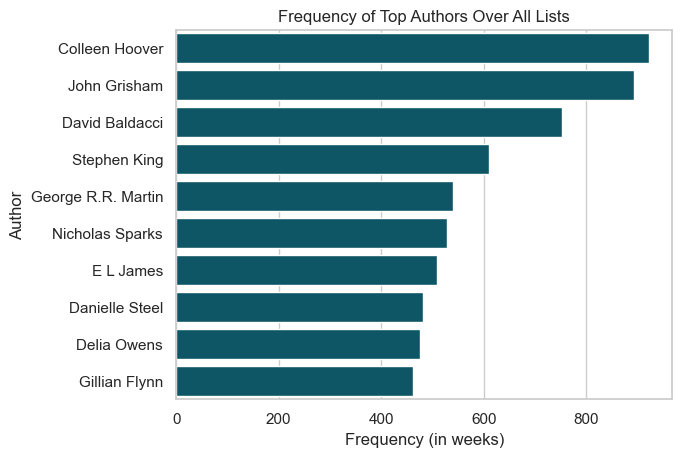

In [953]:
#Turn into a horizontal bar chart
color= "#005F73"
sns.set_theme(style="whitegrid")
sns.set_palette([color])
bar = sns.barplot(x=top_10_authors.values,
                  y=top_10_authors.index,
                  orient='h', 
                  color=color)
bar.set(ylabel="Author", xlabel='Frequency (in weeks)', title="Frequency of Top Authors Over All Lists")
bar.set_xticklabels(bar.get_xticklabels(), rotation=0)

In [896]:
#Find top 10 authors for each book list
grouped_by_list = full_merge.groupby(['nyt_list', 'author']).size().reset_index(name='weeks_count')
sorted_by_list = grouped_by_list.sort_values(by='weeks_count', ascending=False)


In [897]:
#Get top 10 from each category for weekly lists
top_10 = sorted_by_list.groupby('nyt_list').head(10)
#remove monthly from this
monthly_lists = ['Audio Fiction', 'Mass Market Monthly']
top_10_author_by_week = sorted_by_list[~sorted_by_list['nyt_list'].isin(monthly_lists)]
top_10_author_by_week = top_10_author_by_week.groupby('nyt_list').head(10)


In [966]:
colors = ["#606C38", "#283618", "#DDA15E", "#BC6C25", "#0A9396", "#94D2BD", "#CA6702", "#BB3E03", "#AE2012", "#9B2226"]

c:\Users\melan\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


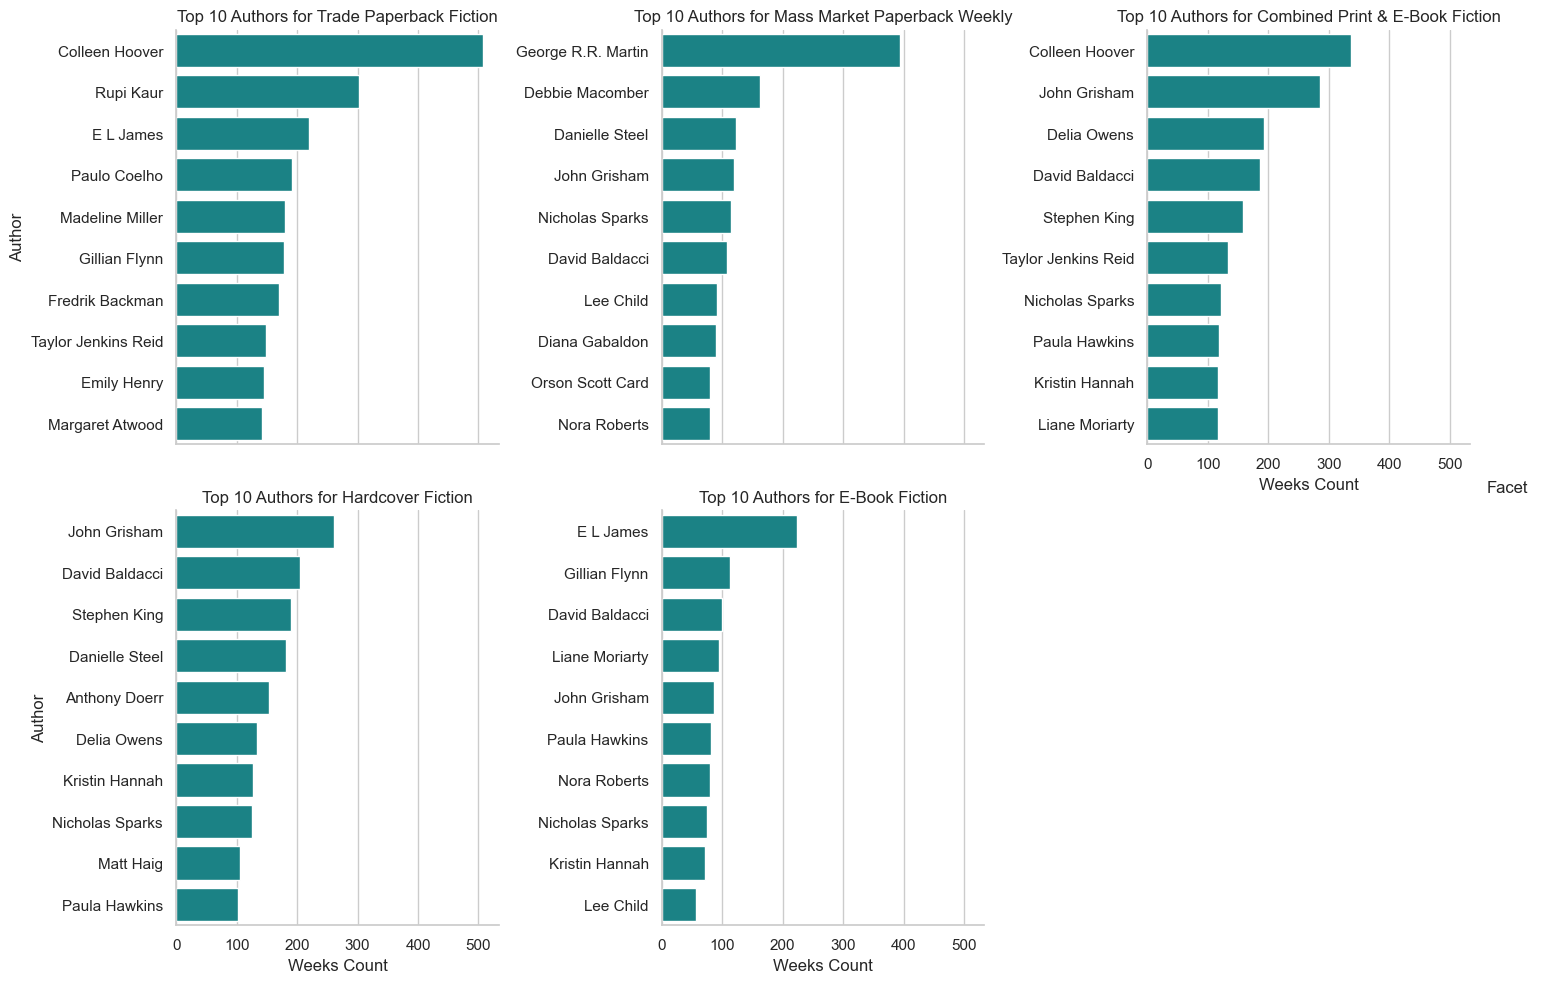

In [971]:
# Make facetgrid with each nyt_list category's top 10 authors
color2 = "#0A9396"
ax = sns.FacetGrid(top_10_author_by_week, col='nyt_list', col_wrap=3, height=5, sharey=False)
ax.map(sns.barplot, 'weeks_count', 'author', color=color2)
ax.set_titles('Top 10 Authors for {col_name}')
ax.set_axis_labels('Weeks Count', 'Author')
ax.add_legend(title="Facet")



In [899]:
# #Figure out how to have authors have standardized colors across charts for easier comparison
# #Define color dictionary 
# author_palettes = {
#     'George R.R. Martin': 'Blues',
#     'Debbie Macomber': 'Reds',
#     'Nicholas Sparks': 'Greens',
#     'Orson Scott Card': 'Oranges',
#     'John Grisham': 'Yellows',
#     'Danielle Steel': 'Grays',
#     'David Baldacci': 'blueviolet',
#     'Lee Child': 'darkorchid',
#     'Ron Carr': 'deeppink',
#     'Nora Roberts': 'gold',
#     'Rupi Kaur': 'salmon',
#     'Margaret Atwood': 'maroon',
#     'E L James': 'dimgrey',
#     'Heather Morris': 'sandybrown',
#     'Ernest Cline': 'lavender',
#     'Paulo Coelho': 'darksage',
#     'Gillian Flynn': 'lightgrey',
#     'Colleen Hoover': 'powderblue',
#     'Gail Honeyman': 'pink',
#     'Fredrik Backman': 'lightsage',
#     'Stephen King': 'steelblue',
#     'Paula Hawkins': 'coral',
#     'Celeste Ng': 'slateblue',
#     'Kristin Hannah': 'orange',
#     'Liane Moriarty': 'forestgreen',
#     'Anthony Doerr': 'mediumpurple',
#     'Lisa Wingate': 'orchid'
# }

In [900]:
#Find top 10 authors for each monthly book list
grouped_by_list = full_merge.groupby(['nyt_list', 'author']).size().reset_index(name='month_count')
sorted_by_list = grouped_by_list.sort_values(by='month_count', ascending=False)
#Get top 10 from each category for weekly lists
top_10_monthly = sorted_by_list.groupby('nyt_list').head(10)
#remove monthly from this
monthly_lists = ['Audio Fiction', 'Mass Market Monthly']
top_10_author_by_month = sorted_by_list[sorted_by_list['nyt_list'].isin(monthly_lists)]
top_10_author_by_month = top_10_author_by_month.groupby('nyt_list').head(10)

c:\Users\melan\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


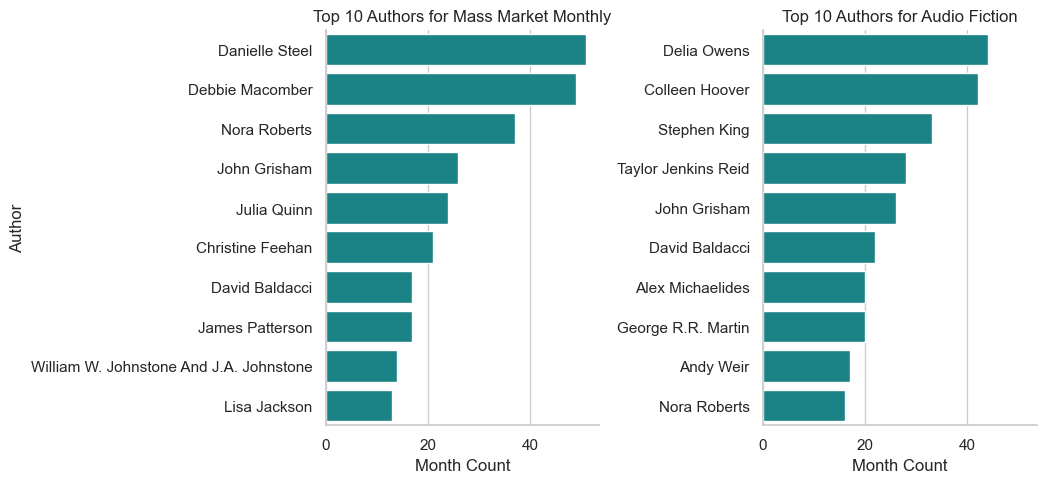

In [972]:
# Make facetgrid with each nyt_list category's top 10 authors
ay = sns.FacetGrid(top_10_author_by_month, col='nyt_list', col_wrap=3, height=5, sharey=False)
ay.map(sns.barplot, 'month_count', 'author', color=color2)
ay.set_titles('Top 10 Authors for {col_name}')
ay.set_axis_labels('Month Count', 'Author')

In [902]:
#Find max weeks_on_list for each book/author/list combo
full_merge['max_weeks_on_list'] = full_merge.groupby(['nyt_list', 'title', 'author'])['weeks_on_list'].transform('max')
full_merge.head(10)


,title,description,author,publisher,primary_isbn13,rank,rank_last_week,weeks_on_list,week,nyt_list,file,month,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genres,genre1,genre2,genre3,max_weeks_on_list
0,The Guernsey Literary And Potato Peel Pie Society,"After World War II, a journalist travels to th...",Mary Ann Shaffer And Annie Barrows,Dial,9780440337973,2,0,2,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance,2
1,The Whistler,A whistleblower alerts a Florida investigator ...,John Grisham,Doubleday,9780385541206,3,4,12,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller,12
2,Ring Of Fire,"Pike Logan, a member of a secret counterterror...",Brad Taylor,Dutton,9781101984772,4,0,1,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,Ring of Fire,Brad Taylor,4.28,4371.0,230.0,2017-01-10,"Thriller, Fiction, Action, Military Fiction, S...",Thriller,Fiction,Action,1
3,Small Great Things,"A medical crisis entangles a black nurse, a wh...",Jodi Picoult,Ballantine,9780345544964,5,7,9,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,Small Great Things,Jodi Picoult,4.35,342790.0,30250.0,2016-10-11,"Fiction, Contemporary, Audiobook, Adult, Adult...",Fiction,Contemporary,Audiobook,9
4,A Man Called Ove,"An angry old curmudgeon gets new neighbors, an...",Fredrik Backman,Atria,9781476738031,7,9,3,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,A Man Called Ove,Fredrik Backman,4.38,917052.0,98756.0,2012-08-27,"Fiction, Contemporary, Audiobook, Humor, Adult...",Fiction,Contemporary,Audiobook,3
5,The Mistress,The beautiful mistress of a Russian oligarch f...,Danielle Steel,Delacorte,9780425285350,8,2,2,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,The Mistress,Danielle Steel,3.89,11239.0,680.0,2017-01-03,"Romance, Fiction, Chick Lit, Adult, Contempora...",Romance,Fiction,Chick Lit,2
6,The Guests On South Battery,Spirits invade the life of a Charleston realtor.,Karen White,Berkley,9780698193000,9,0,1,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,The Guests on South Battery,Karen White,4.13,10032.0,949.0,2017-01-10,"Mystery, Fiction, Paranormal, Ghosts, Romance,...",Mystery,Fiction,Paranormal,1
7,No Man'S Land,"John Puller, a special agent with the Army, se...",David Baldacci,Grand Central,9781455586493,10,0,8,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,No Man's Land,David Baldacci,4.20,44963.0,2474.0,2016-11-15,"Fiction, Thriller, Mystery, Crime, Audiobook, ...",Fiction,Thriller,Mystery,8
8,Below The Belt,The New York lawyer Stone Barrington faces dan...,Stuart Woods,Putnam,9780399574184,11,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,Below the Belt,Stuart Woods,4.01,6351.0,435.0,2017-01-03,"Mystery, Fiction, Thriller, Crime, Suspense, A...",Mystery,Fiction,Thriller,1
9,Cross The Line,"Detective Alex Cross and his wife, Bree, team ...",James Patterson,"Little, Brown",9780316407168,12,0,0,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,Cross the Line,James Patterson,4.08,24059.0,1354.0,2016-11-16,"Mystery, Fiction, Thriller, Crime, Mystery Thr...",Mystery,Fiction,Thriller,5


In [903]:
#Find average week duration of each genre
avg_genre_duration = full_merge.groupby('genre1')['max_weeks_on_list'].mean().sort_values(ascending=False)
top10_avg_genre_duration = avg_genre_duration.head(10)

In [904]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'Top Genre')

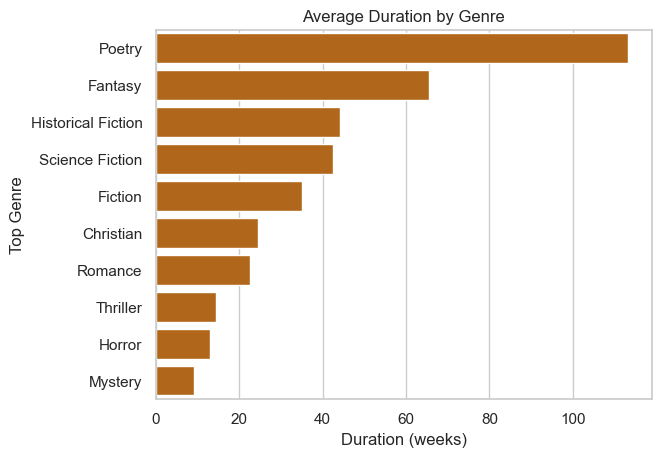

In [973]:
#create chart
color3="#CA6702"
sns.barplot(x=top10_avg_genre_duration.values, y=top10_avg_genre_duration.index, orient='h', color=color3)

plt.title("Average Duration by Genre")
plt.xlabel('Duration (weeks)')
plt.ylabel('Top Genre')

In [906]:
#Find average week duration of each author
avg_author_duration = full_merge.groupby('author')['max_weeks_on_list'].mean().sort_values(ascending=False)
top10_avg_author_duration = avg_author_duration.head(10)

In [907]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'Author')

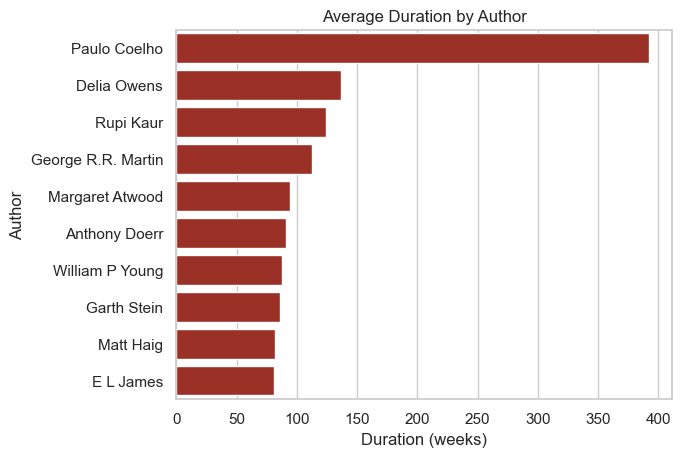

In [974]:
#create chart
color4="#AE2012"
sns.barplot(x=top10_avg_author_duration.values, y=top10_avg_author_duration.index, orient='h', color=color4)

plt.title("Average Duration by Author")
plt.xlabel('Duration (weeks)')
plt.ylabel('Author')

In [909]:
#Extract month and year from date_published column
full_merge['month2'] = pd.to_datetime(full_merge['date_published']).dt.month
full_merge['year'] = pd.to_datetime(full_merge['date_published']).dt.year
full_merge.head()

,title,description,author,publisher,primary_isbn13,rank,rank_last_week,weeks_on_list,week,nyt_list,file,month,title_y,author_y,avg_rating,count_rating,count_reviews,date_published,top_genres,genre1,genre2,genre3,max_weeks_on_list,month2,year
0,The Guernsey Literary And Potato Peel Pie Society,"After World War II, a journalist travels to th...",Mary Ann Shaffer And Annie Barrows,Dial,9780440337973,2,0,2,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.19,721465.0,60356.0,2008-07-29,"Historical Fiction, Fiction, Romance, Historic...",Historical Fiction,Fiction,Romance,2,7.0,2008.0
1,The Whistler,A whistleblower alerts a Florida investigator ...,John Grisham,Doubleday,9780385541206,3,4,12,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,The Whistler,John Grisham,3.95,120472.0,7710.0,2016-10-25,"Fiction, Mystery, Thriller, Audiobook, Crime, ...",Fiction,Mystery,Thriller,12,10.0,2016.0
2,Ring Of Fire,"Pike Logan, a member of a secret counterterror...",Brad Taylor,Dutton,9781101984772,4,0,1,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,Ring of Fire,Brad Taylor,4.28,4371.0,230.0,2017-01-10,"Thriller, Fiction, Action, Military Fiction, S...",Thriller,Fiction,Action,1,1.0,2017.0
3,Small Great Things,"A medical crisis entangles a black nurse, a wh...",Jodi Picoult,Ballantine,9780345544964,5,7,9,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,Small Great Things,Jodi Picoult,4.35,342790.0,30250.0,2016-10-11,"Fiction, Contemporary, Audiobook, Adult, Adult...",Fiction,Contemporary,Audiobook,9,10.0,2016.0
4,A Man Called Ove,"An angry old curmudgeon gets new neighbors, an...",Fredrik Backman,Atria,9781476738031,7,9,3,2017-01-25,E-Book Fiction,2012to2017_e_book_fiction,NaN,A Man Called Ove,Fredrik Backman,4.38,917052.0,98756.0,2012-08-27,"Fiction, Contemporary, Audiobook, Humor, Adult...",Fiction,Contemporary,Audiobook,3,8.0,2012.0


In [910]:
#Group by month and genre, calculate total books published per month
genre_counts = full_merge.groupby(['month2', 'genre1'])['title'].count().unstack().fillna(0)
genre_counts.head(20)


genre1,Adventure,Amish,Anthologies,BDSM,Chick Lit,Christian,Christian Fiction,Christmas,Contemporary Romance,Crime,Dark,Dystopia,Erotica,Fantasy,Fiction,Graphic Novels,Harlequin,Historical Fiction,Historical Romance,History,Horror,Humor,Magical Realism,Menage,Military Fiction,Mystery,New Adult,Paranormal,Paranormal Romance,Poetry,Romance,Romantic Suspense,Science Fiction,Shapeshifters,Short Stories,Sports,Star Trek,Star Wars,Suspense,Thriller,True Crime,Urban Fantasy,Vampires,Westerns,Young Adult,Zombies
month2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,1.0,8.0,0.0,2.0,35.0,0.0,10.0,2.0,0.0,3.0,89.0,1299.0,0.0,2.0,330.0,17.0,1.0,113.0,0.0,2.0,0.0,2.0,567.0,2.0,35.0,9.0,0.0,678.0,7.0,129.0,0.0,28.0,0.0,1.0,3.0,0.0,252.0,2.0,5.0,7.0,5.0,0.0,0.0
2.0,0.0,0.0,0.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,323.0,0.0,0.0,143.0,7.0,0.0,14.0,0.0,0.0,0.0,0.0,398.0,1.0,11.0,4.0,1.0,189.0,1.0,10.0,0.0,11.0,0.0,0.0,3.0,0.0,136.0,0.0,8.0,0.0,2.0,0.0,1.0
3.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,756.0,0.0,0.0,120.0,8.0,0.0,6.0,0.0,0.0,0.0,0.0,405.0,1.0,23.0,3.0,2.0,258.0,4.0,7.0,0.0,0.0,2.0,0.0,7.0,1.0,65.0,0.0,27.0,2.0,2.0,0.0,0.0
4.0,0.0,2.0,0.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,120.0,489.0,0.0,0.0,329.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,607.0,8.0,30.0,3.0,3.0,584.0,0.0,6.0,0.0,3.0,0.0,0.0,9.0,0.0,118.0,0.0,3.0,0.0,3.0,0.0,0.0
5.0,12.0,0.0,2.0,0.0,21.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,49.0,1178.0,0.0,0.0,436.0,7.0,0.0,86.0,1.0,0.0,0.0,1.0,374.0,2.0,22.0,0.0,0.0,550.0,7.0,14.0,0.0,4.0,0.0,0.0,5.0,0.0,40.0,0.0,6.0,0.0,4.0,13.0,1.0
6.0,11.0,0.0,2.0,0.0,12.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,890.0,0.0,0.0,493.0,5.0,0.0,38.0,0.0,0.0,0.0,1.0,515.0,0.0,12.0,1.0,0.0,244.0,0.0,16.0,0.0,0.0,1.0,0.0,2.0,0.0,129.0,0.0,7.0,0.0,2.0,0.0,0.0
7.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,95.0,477.0,8.0,0.0,75.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,432.0,3.0,12.0,3.0,2.0,259.0,9.0,19.0,0.0,7.0,0.0,0.0,16.0,0.0,149.0,0.0,11.0,0.0,1.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,275.0,464.0,0.0,0.0,138.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,428.0,0.0,25.0,3.0,1.0,558.0,13.0,135.0,0.0,1.0,0.0,0.0,1.0,0.0,91.0,0.0,12.0,0.0,0.0,0.0,0.0
9.0,41.0,1.0,0.0,0.0,0.0,22.0,23.0,15.0,0.0,0.0,0.0,0.0,1.0,159.0,1070.0,1.0,0.0,264.0,2.0,0.0,222.0,0.0,0.0,0.0,0.0,558.0,1.0,35.0,1.0,108.0,420.0,9.0,189.0,0.0,3.0,1.0,0.0,8.0,0.0,198.0,0.0,11.0,0.0,1.0,0.0,0.0


In [911]:
#Calculate count of books published each month per author
author_counts = full_merge.groupby(['month2', 'author'])['title'].count().unstack().fillna(0)
author_counts.head(10)

author  A L Jackson  A.J. Finn  Ace Atkins  Adam Johnson  Alan Bradley  \
month2                                                                   
1.0             2.0      140.0         1.0           8.0           7.0   
2.0             0.0        0.0         0.0           0.0           0.0   
3.0             0.0        0.0         0.0           0.0           0.0   
4.0             0.0        0.0         0.0           0.0           0.0   
5.0             0.0        0.0        14.0           0.0           0.0   
6.0             0.0        0.0         0.0           0.0           0.0   
7.0             0.0        0.0         0.0           0.0           0.0   
8.0             0.0        0.0         0.0           0.0           0.0   
9.0             0.0        0.0         0.0           0.0           3.0   
10.0            0.0        0.0         0.0           0.0           0.0   

author  Aleatha Romig  Alex Berenson  Alexander Mccall Smith  Alice Hoffman  \
month2                                                                        
1.0               1.0            1.0                    10.0            3.0   
2.0               0.0           13.0                     0.0            0.0   
3.0               0.0            0.0                     0.0            0.0   
4.0               0.0            0.0                     1.0            0.0   
5.0               0.0            0.0                     0.0            0.0   
6.0               0.0            0.0                     0.0            0.0   
7.0               0.0            0.0                     0.0            0.0   
8.0               0.0            0.0                     0.0            3.0   
9.0               0.0            0.0                     3.0            1.0   
10.0              0.0            0.0                     2.0            7.0   

author  Alice Munro  Allison Pataki  Andrea Camilleri  Andrzej Sapkowski  \
month2                                                                     
1.0            18.0             3.0               1.0               27.0   
2.0             0.0             2.0               0.0                0.0   
3.0             0.0             0.0               0.0                0.0   
4.0             0.0             0.0               0.0                0.0   
5.0             0.0             0.0               0.0                4.0   
6.0             0.0             0.0               0.0                0.0   
7.0             0.0             0.0               0.0                0.0   
8.0             0.0             0.0               0.0                0.0   
9.0             0.0             0.0               0.0                0.0   
10.0            0.0             0.0               0.0                0.0   

author  André Aciman  Anita Diamant  Ann Napolitano  Ann Patchett  Anna North  \
month2                                                                          
1.0             19.0            1.0            13.0           1.0         3.0   
2.0              0.0            0.0             0.0           0.0         0.0   
3.0              0.0            0.0             0.0           0.0         0.0   
4.0              0.0            0.0             0.0           0.0         0.0   
5.0              0.0            0.0             0.0           0.0         0.0   
6.0              0.0            0.0             0.0           0.0         0.0   
7.0              0.0            0.0             0.0           0.0         0.0   
8.0              0.0            0.0             0.0           0.0         0.0   
9.0              0.0            0.0             0.0          97.0         0.0   
10.0             2.0            0.0             0.0           0.0         0.0   

author  Anna Quindlen  Annette Blair And Others  Anthony Ryan  \
month2                                                          
1.0              19.0                       2.0           1.0   
2.0               0.0                       0.0           0.0   
3.0             

In [912]:
#those are too crazy, let's simplify
monthly_counts = full_merge.groupby(['year', 'month'])['title'].count().unstack().fillna(0)


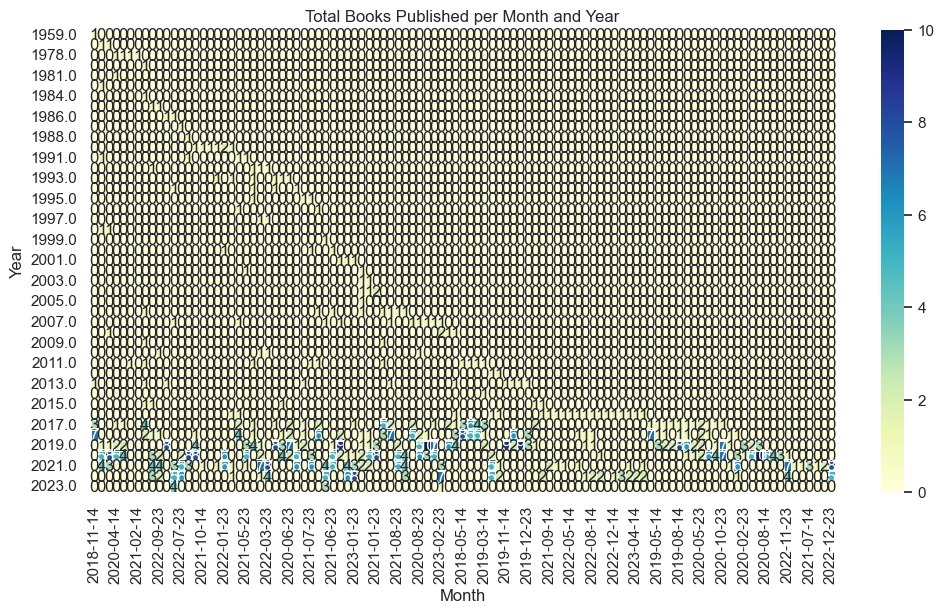

In [913]:
plt.figure(figsize=(12, 6))
plt.title('Total Books Published per Month and Year')
sns.heatmap(monthly_counts, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, cbar=True)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [914]:
#Woah nelly.  Let's limit it to 2013-2023
filtered_df = full_merge[(full_merge['year'] >= 2013) & (full_merge['year'] <= 2023)]


In [915]:
#convert to int
filtered_df['year'] = filtered_df['year'].fillna(0).astype(int)
filtered_df['month2'] = filtered_df['month2'].fillna(0).astype(int)



C:\Users\melan\AppData\Local\Temp\ipykernel_2404\336316983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].fillna(0).astype(int)
C:\Users\melan\AppData\Local\Temp\ipykernel_2404\336316983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month2'] = filtered_df['month2'].fillna(0).astype(int)


In [916]:
#get new monthly counts
monthly_counts = filtered_df.groupby(['year', 'month2'])['title'].count().unstack().fillna(0)


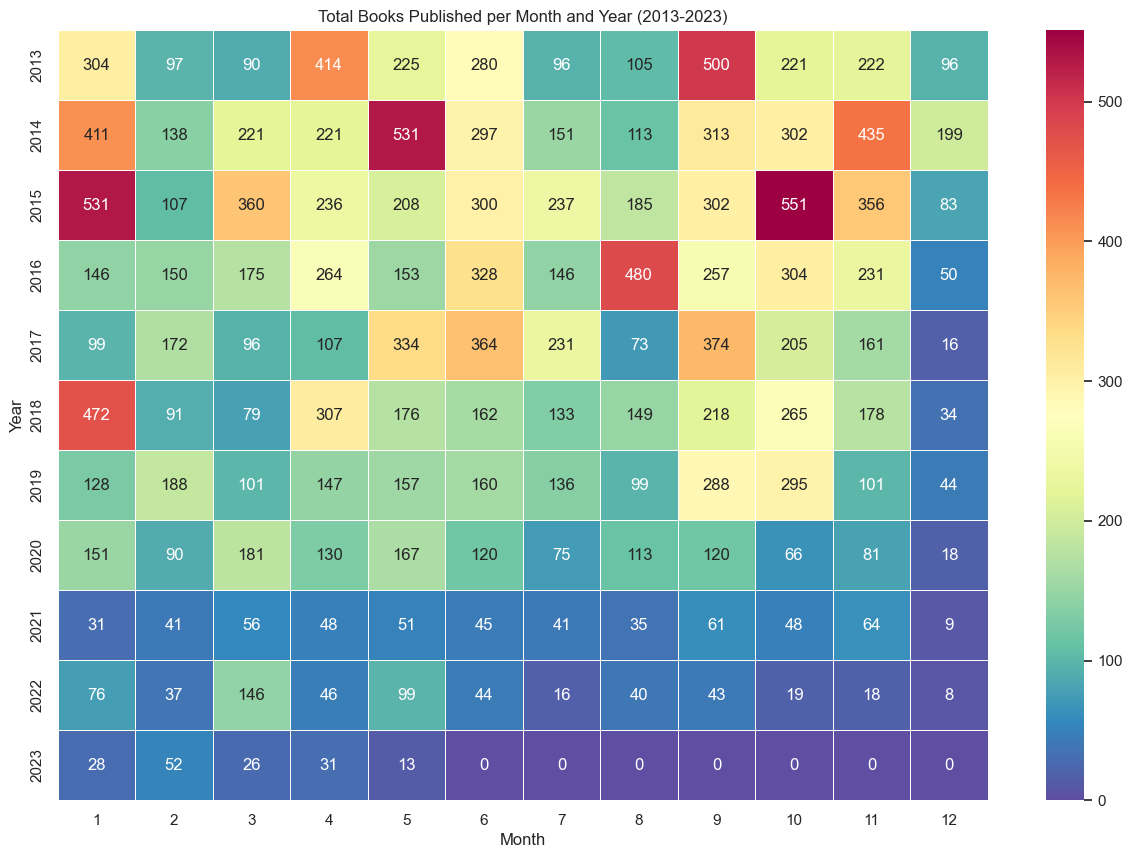

In [979]:
plt.figure(figsize=(15, 10))
plt.title('Total Books Published per Month and Year (2013-2023)')
sns.heatmap(monthly_counts, cmap="Spectral_r", annot=True, fmt='g', linewidths=0.5, cbar=True)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [918]:
#Which genres most frequently on list
genre_frequency = full_merge[['genre1']].value_counts()
genre_frequency10 = genre_frequency.head(10)
genre_frequency10

genre1            
Fiction               8847
Mystery               5480
Romance               4713
Historical Fiction    2783
Thriller              1382
Fantasy               1196
Science Fiction        575
Horror                 564
Poetry                 420
Paranormal             242
dtype: int64

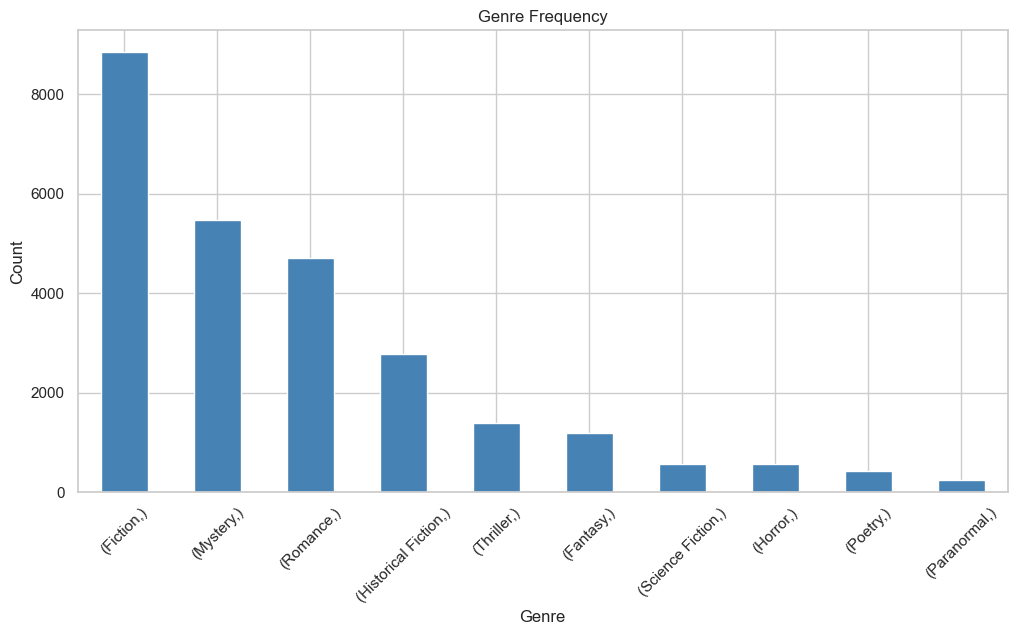

In [919]:
plt.figure(figsize=(12, 6))
genre_frequency10.plot(kind='bar', color='steelblue')
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x2000 with 0 Axes>

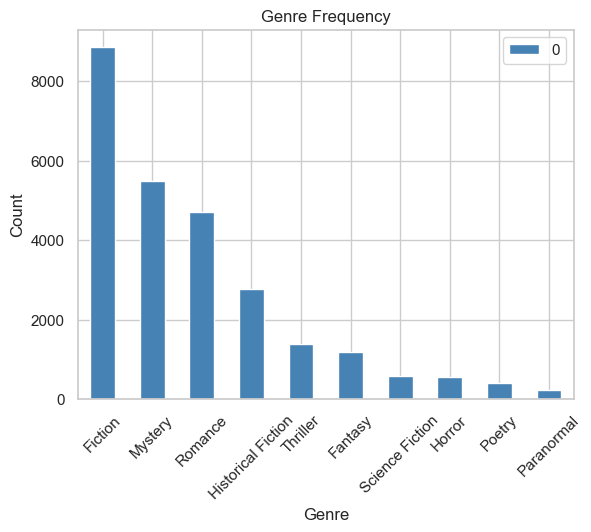

In [920]:
#fix weird parentheses and commas
plt.figure(figsize=(20, 20))
genre_frequency10 = genre_frequency10.reset_index()
genre_frequency10['genre1'] = genre_frequency10['genre1'].str.strip('(),')
genre_frequency10.plot(x='genre1', kind='bar', color='steelblue')
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


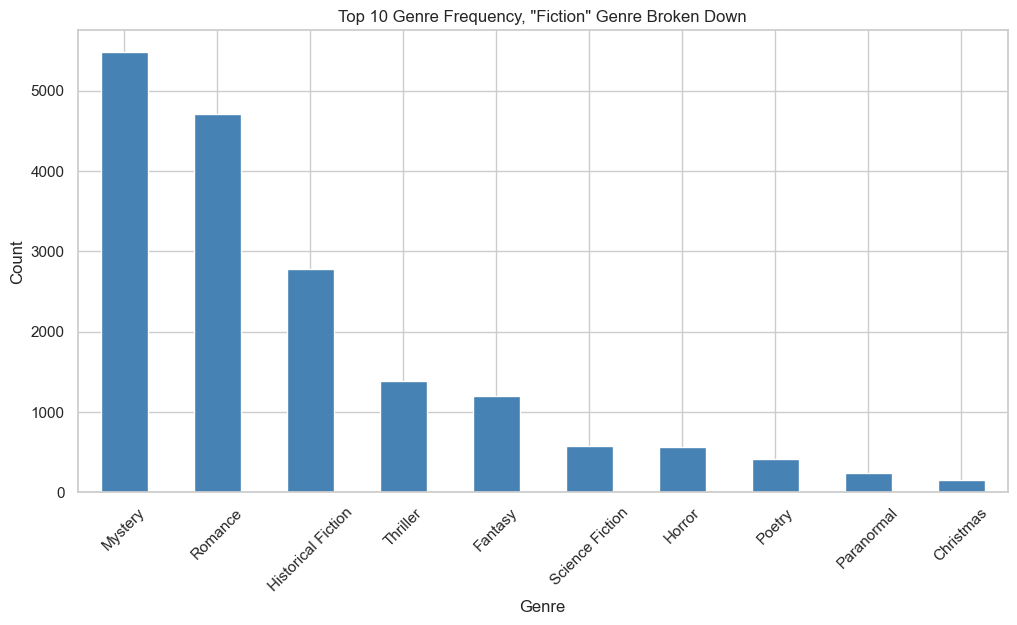

In [921]:
#I really don't want to include fiction... how to take genre2 in the case of fiction in genre1?  I'm not sure this is right
# First get genre frequency for the ones that aren't fiction
genre_frequency = full_merge.loc[full_merge['genre1'] != 'Fiction', 'genre1'].value_counts().head(10)
# Replace "Fiction" genre with genre2
fiction_genre2_counts = full_merge.loc[full_merge['genre1'] == 'Fiction', 'genre2'].value_counts()
genre_frequency = genre_frequency.apply(lambda x: fiction_genre2_counts.get(x, x))

plt.figure(figsize=(12, 6))
genre_frequency.plot(kind='bar', color='steelblue')
plt.title('Top 10 Genre Frequency, "Fiction" Genre Broken Down')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




In [922]:
full_merge.columns

Index(['title', 'description', 'author', 'publisher', 'primary_isbn13', 'rank',
       'rank_last_week', 'weeks_on_list', 'week', 'nyt_list', 'file', 'month',
       'title_y', 'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genres', 'genre1', 'genre2', 'genre3',
       'max_weeks_on_list', 'month2', 'year'],
      dtype='object')

In [923]:
#find most popular genres per list
# group data by list/genre and count
grouped = full_merge.groupby(['nyt_list', 'genre1']).size().reset_index(name='count')
# find index of the maxcount for each list
idx = grouped.groupby('nyt_list')['count'].idxmax()
# sort in descending order
sorted_data = grouped.groupby('nyt_list').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
sorted_data

,nyt_list,genre1,count
0,Audio Fiction,Fiction,100
1,Audio Fiction,Mystery,67
2,Audio Fiction,Fantasy,39
3,Combined Print & E-Book Fiction,Fiction,1974
4,Combined Print & E-Book Fiction,Mystery,1184
5,Combined Print & E-Book Fiction,Romance,995
6,E-Book Fiction,Romance,1180
7,E-Book Fiction,Fiction,1009
8,E-Book Fiction,Mystery,767
9,Hardcover Fiction,Fiction,2480


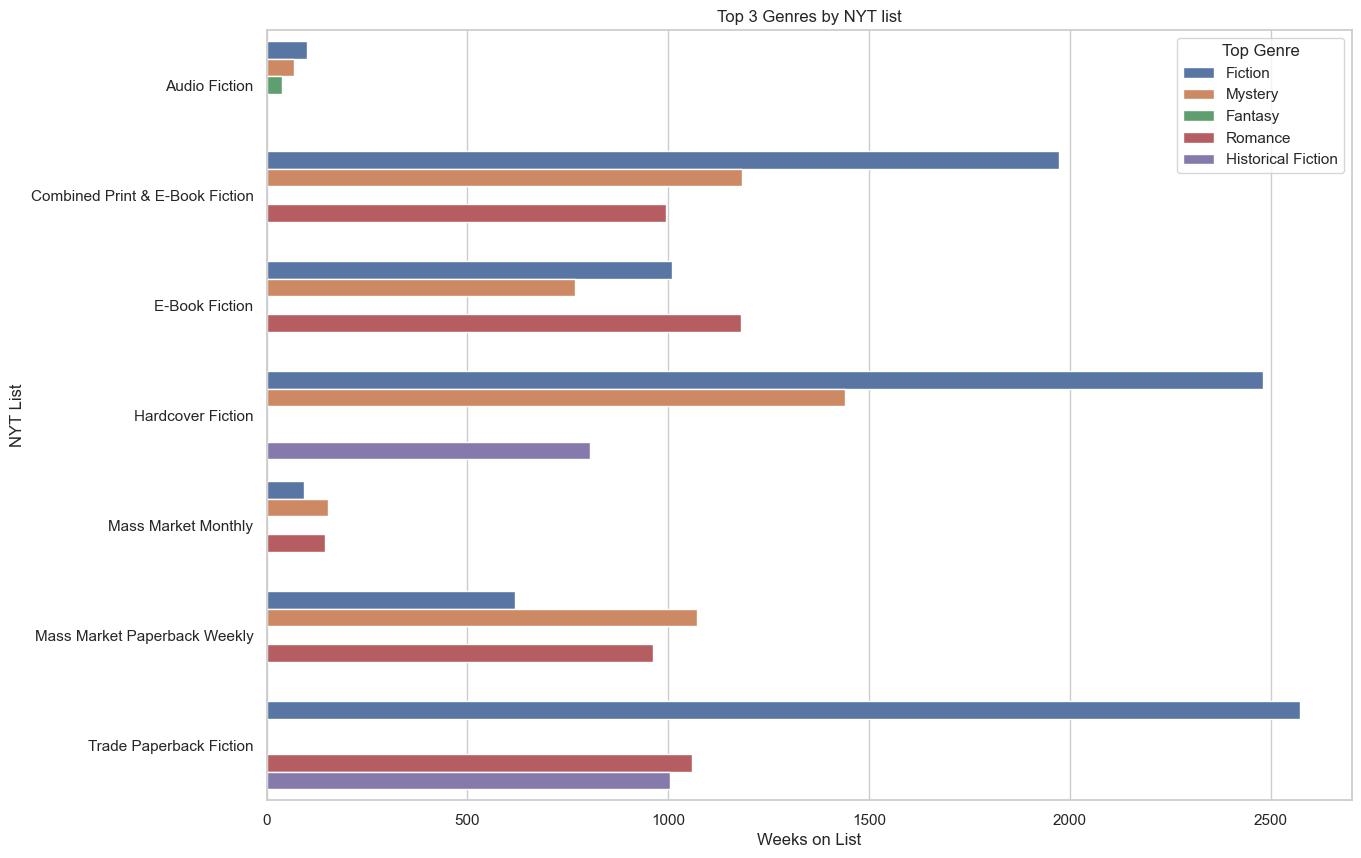

In [924]:
plt.figure(figsize=(14,10))
sns.barplot(x="count", y="nyt_list", hue="genre1", data=sorted_data)
plt.title("Top 3 Genres by NYT list")
plt.xlabel("Weeks on List")
plt.ylabel("NYT List")
plt.legend(title="Top Genre")

In [925]:
full_merge.columns

Index(['title', 'description', 'author', 'publisher', 'primary_isbn13', 'rank',
       'rank_last_week', 'weeks_on_list', 'week', 'nyt_list', 'file', 'month',
       'title_y', 'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genres', 'genre1', 'genre2', 'genre3',
       'max_weeks_on_list', 'month2', 'year'],
      dtype='object')

In [926]:
#find the average longevity for each list
average_weeks = full_merge.groupby('nyt_list')['weeks_on_list'].mean()
average_weeks

nyt_list
Audio Fiction                       0.000000
Combined Print & E-Book Fiction    13.827224
E-Book Fiction                      7.315816
Hardcover Fiction                  10.293333
Mass Market Monthly                 0.000000
Mass Market Paperback Weekly       13.037436
Trade Paperback Fiction            34.124234
Name: weeks_on_list, dtype: float64

In [927]:
#average rating per list
average_rating = full_merge.groupby('nyt_list')['avg_rating'].mean()
average_rating

nyt_list
Audio Fiction                      4.122422
Combined Print & E-Book Fiction    4.057969
E-Book Fiction                     4.026330
Hardcover Fiction                  3.999344
Mass Market Monthly                4.081309
Mass Market Paperback Weekly       4.070765
Trade Paperback Fiction            4.042838
Name: avg_rating, dtype: float64

In [928]:
full_merge.columns

Index(['title', 'description', 'author', 'publisher', 'primary_isbn13', 'rank',
       'rank_last_week', 'weeks_on_list', 'week', 'nyt_list', 'file', 'month',
       'title_y', 'author_y', 'avg_rating', 'count_rating', 'count_reviews',
       'date_published', 'top_genres', 'genre1', 'genre2', 'genre3',
       'max_weeks_on_list', 'month2', 'year'],
      dtype='object')

In [929]:
#does format impact popularity on goodreads?
format_comparison = full_merge.groupby(['title', 'author', 'nyt_list']).agg({'avg_rating': 'mean', 'count_rating': 'sum'}).reset_index()
format_comparison.head(25)
#Can't really use this because ratings stay the same across isbn, only count_rating changes.  Possible look into visualizing that if need more visuals

,title,author,nyt_list,avg_rating,count_rating
0,'Til Death Do Us Part,Amanda Quick,Combined Print & E-Book Fiction,3.84,7617.0
1,'Til Death Do Us Part,Amanda Quick,E-Book Fiction,3.84,7617.0
2,'Tis The Season,Ron Carr,Mass Market Paperback Weekly,4.02,2948.0
3,10Th Anniversary,James Patterson And Maxine Paetro,Mass Market Paperback Weekly,4.11,295356.0
4,11/22/63,Stephen King,Combined Print & E-Book Fiction,4.33,1010577.0
5,11/22/63,Stephen King,E-Book Fiction,4.33,3537009.0
6,11/22/63,Stephen King,Mass Market Paperback Weekly,4.33,6568770.0
7,113 Minutes,James Patterson With Max Dilallo,Combined Print & E-Book Fiction,3.77,4684.0
8,113 Minutes,James Patterson With Max Dilallo,E-Book Fiction,3.77,4684.0
9,113 Minutes,James Patterson With Max Dilallo,Mass Market Paperback Weekly,3.77,9368.0


In [930]:
#try to see if there is a correlation between avg_rating and max_weeks_on_list
#convert both to numeric
full_merge['avg_rating'] = pd.to_numeric(full_merge['avg_rating'])
full_merge['max_weeks_on_list'] = pd.to_numeric(full_merge['max_weeks_on_list'])


In [931]:
#find correlation with corr() function.  This will be between -1 and 1.  The closer it is to 1, the stronger the positive correlation. -1 is negative correlation.  0 is no correlation.
correlation = full_merge['avg_rating'].corr(full_merge['max_weeks_on_list'])


In [932]:
correlation

0.14905175452092134

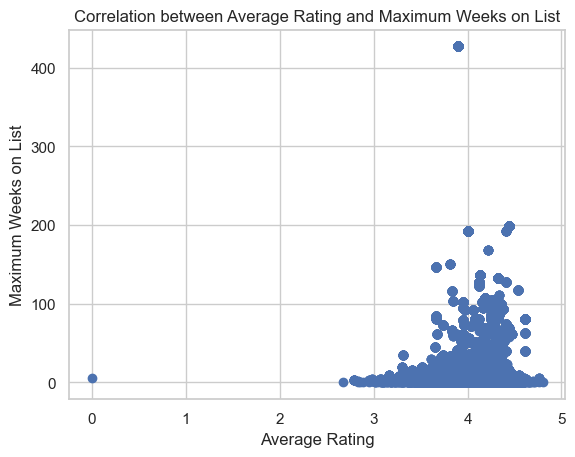

In [933]:
#show it in a scatter
plt.scatter(full_merge['avg_rating'], full_merge['max_weeks_on_list'])
plt.xlabel('Average Rating')
plt.ylabel('Maximum Weeks on List')
plt.title('Correlation between Average Rating and Maximum Weeks on List')
plt.show()


In [934]:
#What about for count_ratings?  Maybe this is a better indicator of popularity
full_merge['count_rating'] = pd.to_numeric(full_merge['count_rating'])
correlation2 = full_merge['count_rating'].corr(full_merge['max_weeks_on_list'])
correlation2

0.7264781802713731

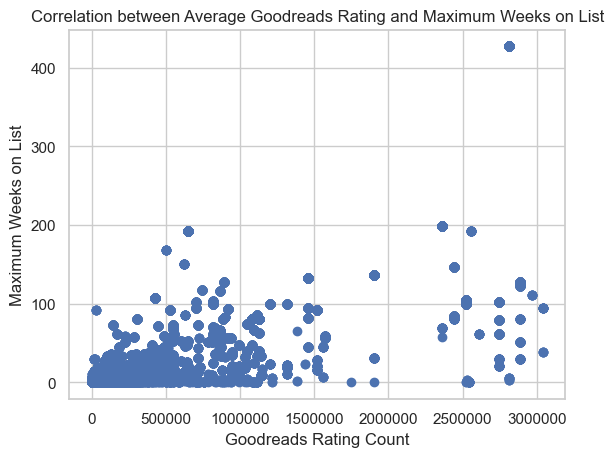

In [935]:
plt.scatter(full_merge['count_rating'], full_merge['max_weeks_on_list'])
plt.xlabel('Goodreads Rating Count')
plt.ylabel('Maximum Weeks on List')
plt.title('Correlation between Average Goodreads Rating and Maximum Weeks on List')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [936]:
#which authors are the most prolific? unique titles only
unique_title_count = full_merge.groupby('author')['title'].nunique()

In [937]:
#sort in descending order
sorted_prolific = unique_title_count.sort_values(ascending=False)

In [938]:
sorted_prolific.head(10)

author
Debbie Macomber     92
Nora Roberts        74
Danielle Steel      65
Christine Feehan    54
Stuart Woods        42
Fern Michaels       38
Susan Mallery       38
David Baldacci      33
Ron Carr            32
Lisa Jackson        28
Name: title, dtype: int64

In [939]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [940]:
from wordcloud import WordCloud

In [941]:
#try a wordcloud!  filter by list and concat description into single string
nyt_lists = full_merge['nyt_list'].unique()

for nyt_list in nyt_lists:
    description_text = ' '.join(full_merge[full_merge['nyt_list'] == nyt_list]['description'].astype(str))


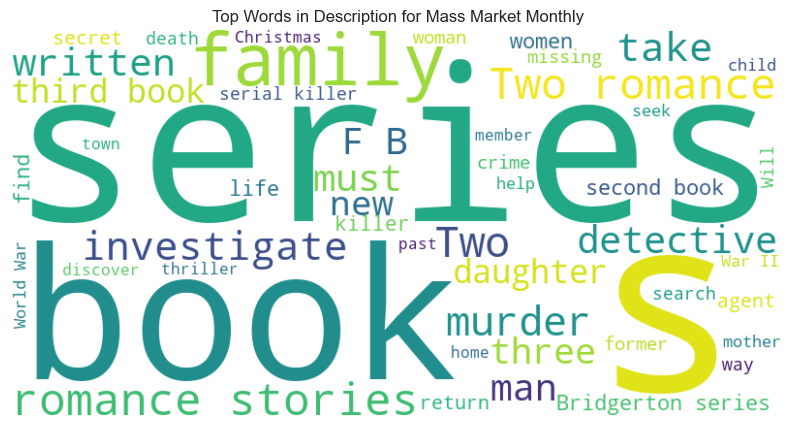

In [942]:
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(description_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Top Words in Description for {nyt_list}')
plt.axis('off')
plt.show()

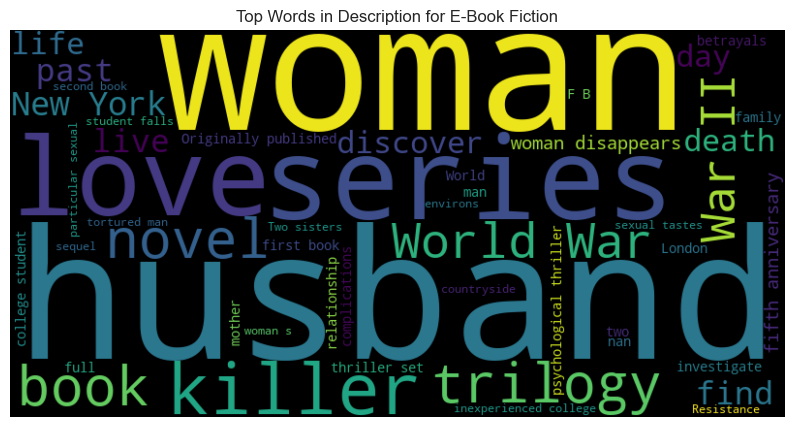

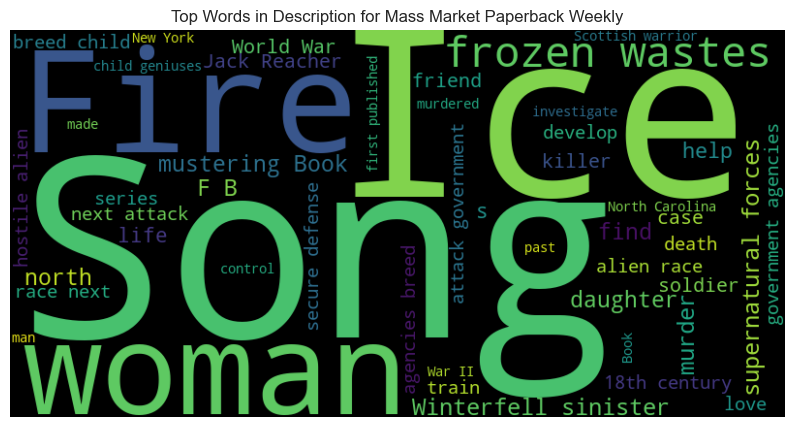

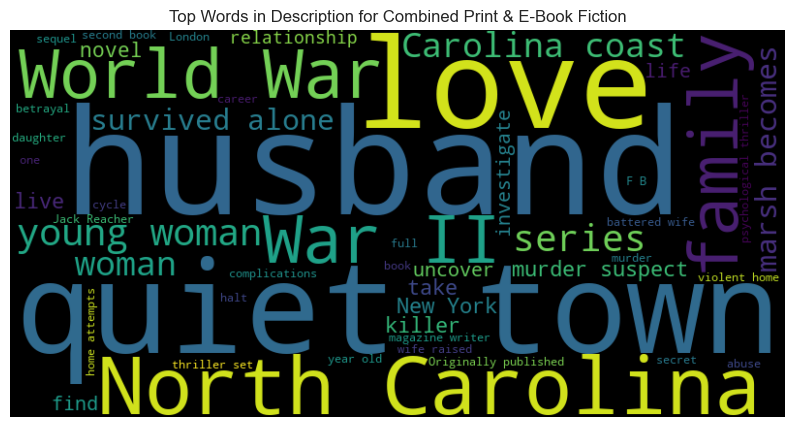

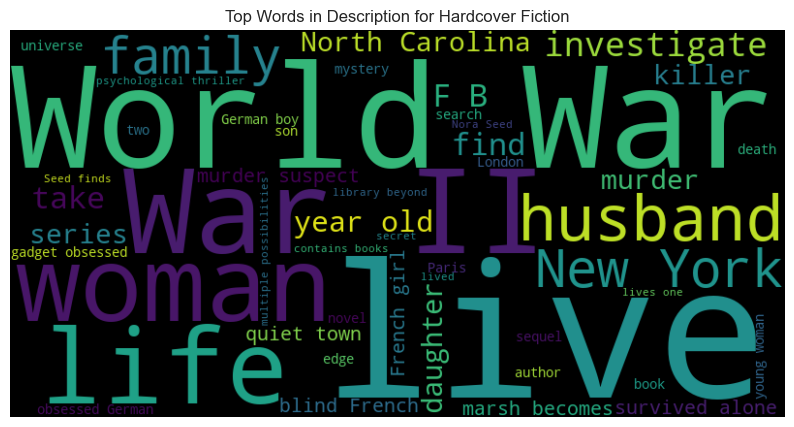

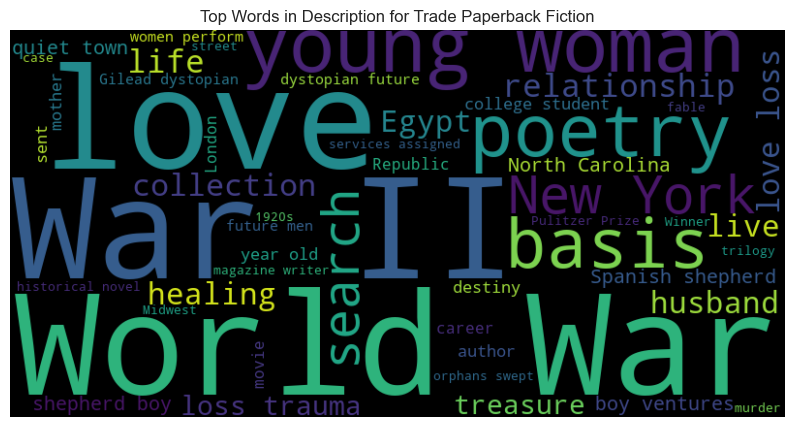

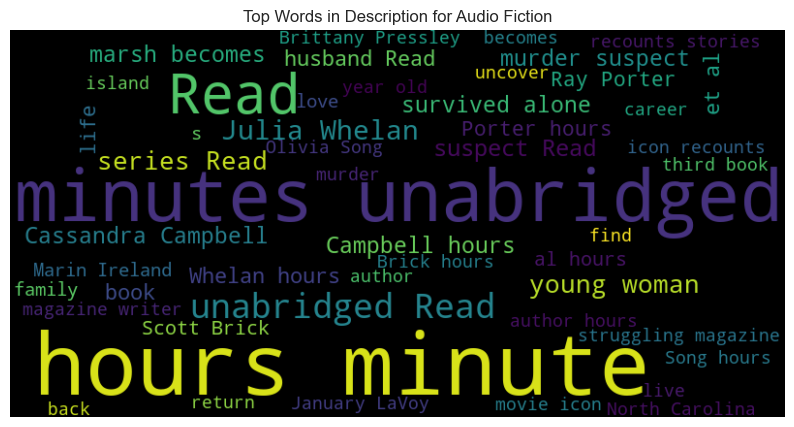

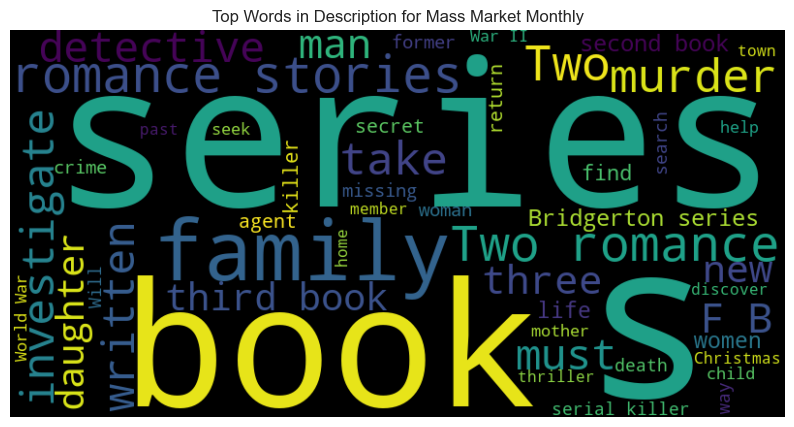

In [943]:
#that only gave me 1, build a loop for the others
for nyt_list in nyt_lists:
    # Filter for the current nyt_list
    filtered_data = full_merge[full_merge['nyt_list'] == nyt_list]
    # Concat into a single string
    description_text = ' '.join(filtered_data['description'].astype(str))
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, max_words=50).generate(description_text)
    # Plot
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top Words in Description for {nyt_list}')
    plt.axis('off')
    plt.show()